To understand how the student's performance (test scores) is affected by the other variables (Gender, Ethnicity, Parental level of education, Lunch, Test preparation course).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("dataset/students-performance.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
data['Total_Marks'] = data['math score']+data['reading score']+data['writing score']
data['Percentage'] = data['Total_Marks']/3
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Marks,Percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [4]:
data.describe()

,math score,reading score,writing score,Total_Marks,Percentage
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000,67.770667
std,15.16308,14.600192,15.195657,42.771978,14.257326
min,0.00000,17.000000,10.000000,27.000000,9.000000
25%,57.00000,59.000000,57.750000,175.000000,58.333333
50%,66.00000,70.000000,69.000000,205.000000,68.333333
75%,77.00000,79.000000,79.000000,233.000000,77.666667
max,100.00000,100.000000,100.000000,300.000000,100.000000


In [5]:
data.corr(method='pearson')

,math score,reading score,writing score,Total_Marks,Percentage
math score,1.000000,0.817580,0.802642,0.918746,0.918746
reading score,0.817580,1.000000,0.954598,0.970331,0.970331
writing score,0.802642,0.954598,1.000000,0.965667,0.965667
Total_Marks,0.918746,0.970331,0.965667,1.000000,1.000000
Percentage,0.918746,0.970331,0.965667,1.000000,1.000000


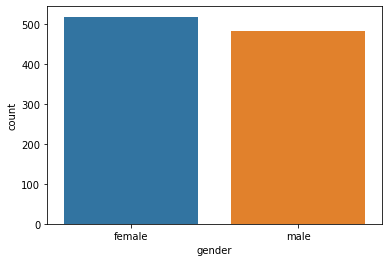

In [6]:
sns.countplot(data=data, x="gender");

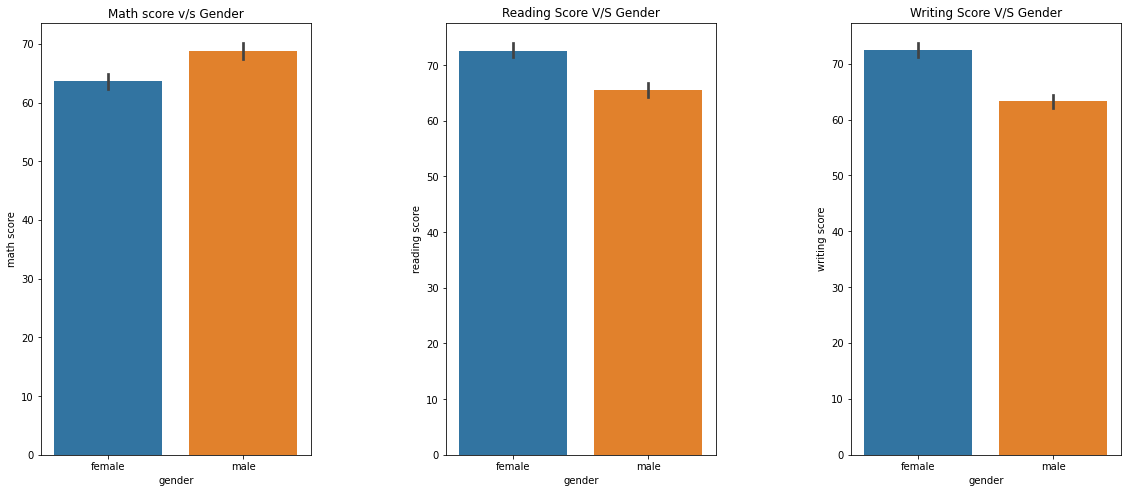

In [7]:
plt.figure(figsize=(15,6))
plt.subplots_adjust(top=1,bottom=0,right=1,left=0,hspace=0.25,wspace=0.5)
plt.subplot(131)
plt.title("Math score v/s Gender")
sns.barplot(x="gender",y='math score',data=data)
plt.subplot(132)
plt.title("Reading Score V/S Gender")
sns.barplot(x='gender',y='reading score',data=data)
plt.subplot(133)
plt.title("Writing Score V/S Gender")
sns.barplot(x='gender',y='writing score',data=data)
plt.show()

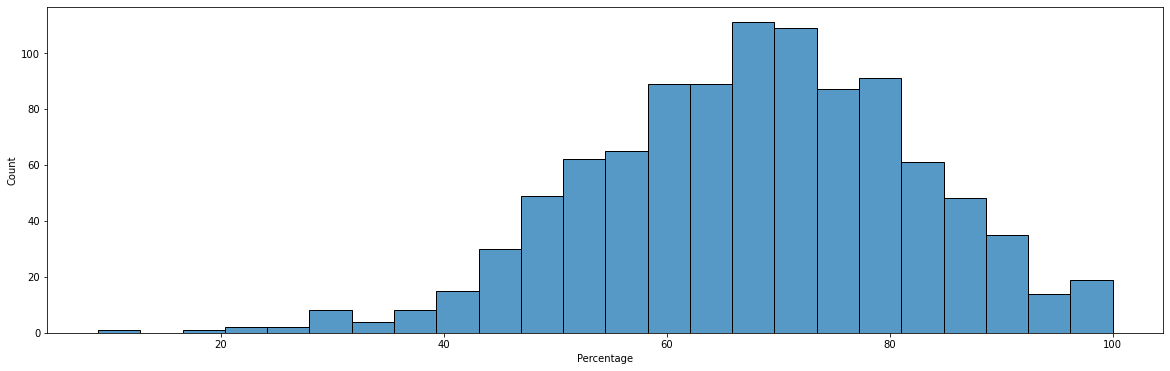

In [8]:
plt.figure(figsize=(20,6))
sns.histplot(data["Percentage"], kde=False);

In [9]:
data['Math_PassStatus'] = np.where(data['math score']<40, 'F', 'P')
data.Math_PassStatus.value_counts()

P    960
F     40
Name: Math_PassStatus, dtype: int64

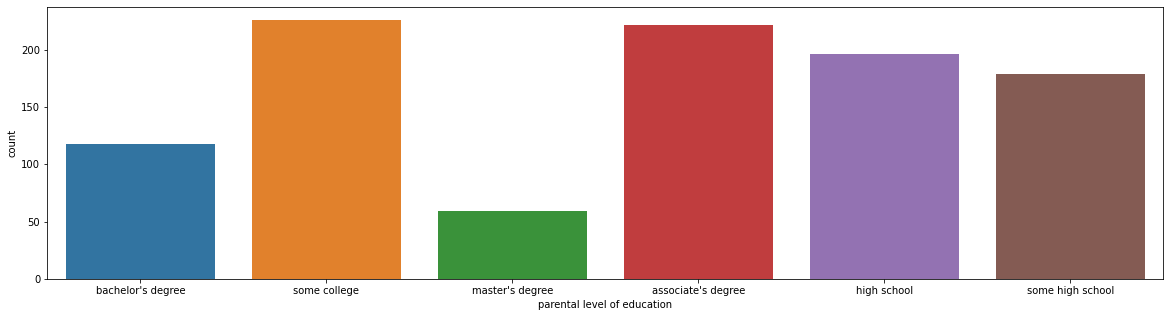

In [10]:
plt.figure(figsize=(20,5))
sns.countplot(x='parental level of education', data=data);

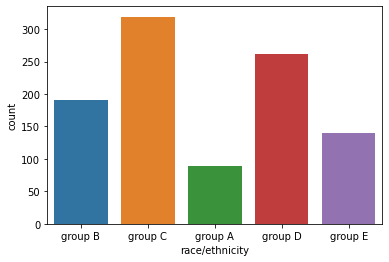

In [11]:
sns.countplot(x='race/ethnicity', data=data);

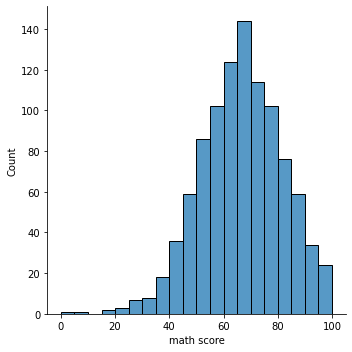

In [12]:
sns.displot(data['math score'], bins=20, kde=False);

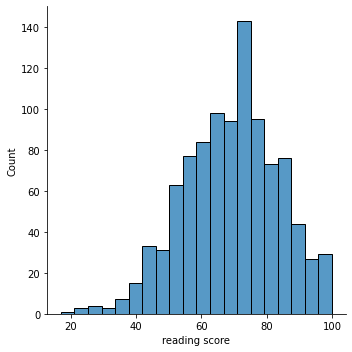

In [13]:
sns.displot(data['reading score'], bins=20, kde=False);

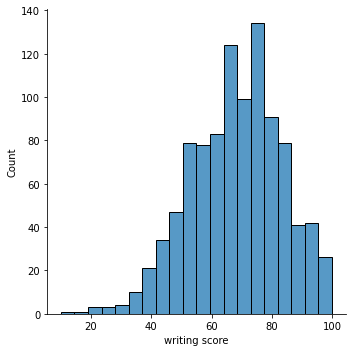

In [14]:
sns.displot(data['writing score'], bins=20, kde=False);

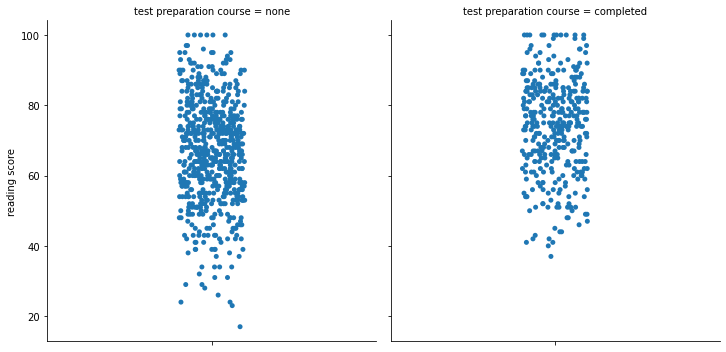

In [15]:
sns.catplot(y="reading score", col="test preparation course", data=data);

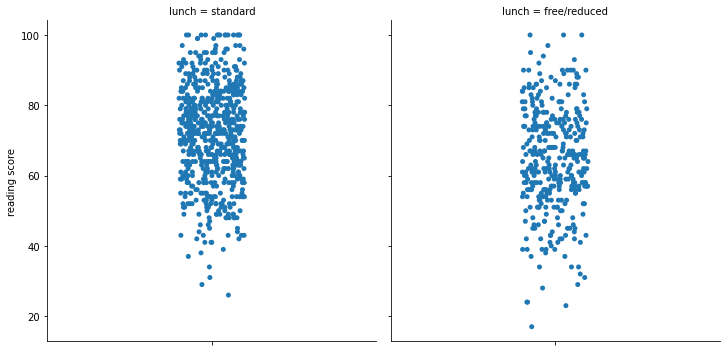

In [16]:
sns.catplot(y="reading score", col="lunch", data=data);

In [17]:
data.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                       int64
reading score                    int64
writing score                    int64
Total_Marks                      int64
Percentage                     float64
Math_PassStatus                 object
dtype: object

In [18]:
data = data.astype({"gender": 'category', "race/ethnicity": 'category', "parental level of education": 'category', 
                    "lunch": 'category', "test preparation course": 'category'})
data=data.drop("Math_PassStatus", axis=1)

In [19]:
from sklearn.model_selection import train_test_split
x=data.drop(['Percentage'], axis=1, inplace=False)
y=data["Percentage"]
x=pd.get_dummies(x, drop_first=True)
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.33, random_state=101)

In [20]:
from sklearn.linear_model import LinearRegression
logmodel = LinearRegression()
logmodel = logmodel.fit(x_train, y_train)
pred = logmodel.predict(x_test)

In [21]:
logmodel.score(x_train, y_train)

1.0

### <div style="text-align: right"> Developed by Mr. Ronik Dedhia</div>